In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  Old Faithful Geyser

![Old Faithful Geyser of Yellowstone, Wyoming](https://upload.wikimedia.org/wikipedia/commons/e/ef/Bierstadt_Albert_Old_Faithful.jpg)

> (Old faithful geyser of the Yellowstone National Park, Wyoming, USA. This painting is by Albert Bierstadt; it is in the public domain and taken from Wikipedia).


This is a classic dataset, of the famous "Old Faithful Geyser". A part of its geothermal activities has been its periodic eruptions which have been consistently happening for decades, spaced between 40 minutes to 2 hours apart.

For the old faithful geyser, after an eruption has finished, the waiting time to the next eruption is related to the duration of this eruption that just finished. We will explore this, and build a regression model to predict the waiting time.

This dataset is available on the github url:  **https://github.com/supportvectors/ml-100**. 

## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in data science notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`


Many of the pertinent discussions are present therein; for brevity, we will not repeat those explanations, and will omit some of the steps, so that we can focus on the main topic on this notebook.

## Lab Goals

* We will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear model to make prediction on the data. 

## Outcome

You will learn how to example a simple, real-world dataset, and build a prediction model around it.


## Load and explore the data

Let us load the data from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/old-faithful-geyser.csv

Let us, therefore, load it, and perform some basic explorations. *Note: this data file has the columns as tab-separated.*

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/old-faithful-geyser.csv'
raw_data = pd.read_csv(source, sep='\t')

raw_data

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


## Standardizing the data

In [3]:
scaler = StandardScaler()   # this class comes from the sklearn library
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'eruptions':scaled[:, 0], 'waiting': scaled[:,1]})
data.describe()

,eruptions,waiting
count,2.720000e+02,2.720000e+02
mean,4.800082e-16,4.408238e-16
std,1.001843e+00,1.001843e+00
min,-1.657009e+00,-2.055795e+00
25%,-1.163053e+00,-9.504124e-01
50%,4.496005e-01,3.760469e-01
75%,8.483203e-01,8.182000e-01
max,1.415130e+00,1.849891e+00


In [4]:
data.sample(5)

,eruptions,waiting
30,0.712927,0.154970
116,-1.027660,-1.539950
79,0.098499,0.891892
127,0.888478,0.818200
196,0.010723,1.186661


#### Descriptive statistics


In [5]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
eruptions,272.0,4.800082e-16,1.001843,-1.657009,-1.163053,0.449601,0.84832,1.415130
waiting,272.0,4.408238e-16,1.001843,-2.055795,-0.950412,0.376047,0.81820,1.849891


#### Missing Values Analysis


In [6]:
data.isnull().sum()

eruptions    0
waiting      0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling



In [7]:
# Uncomment this to run it.
# data.profile_report()

## Data Visualization

### Plotting using matplotlib

Let us first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

Overall, looking at the plots, one is encouraged to believe that a simple linear regression (OLS) may work well for this data. Let us see if this is true in the next section.

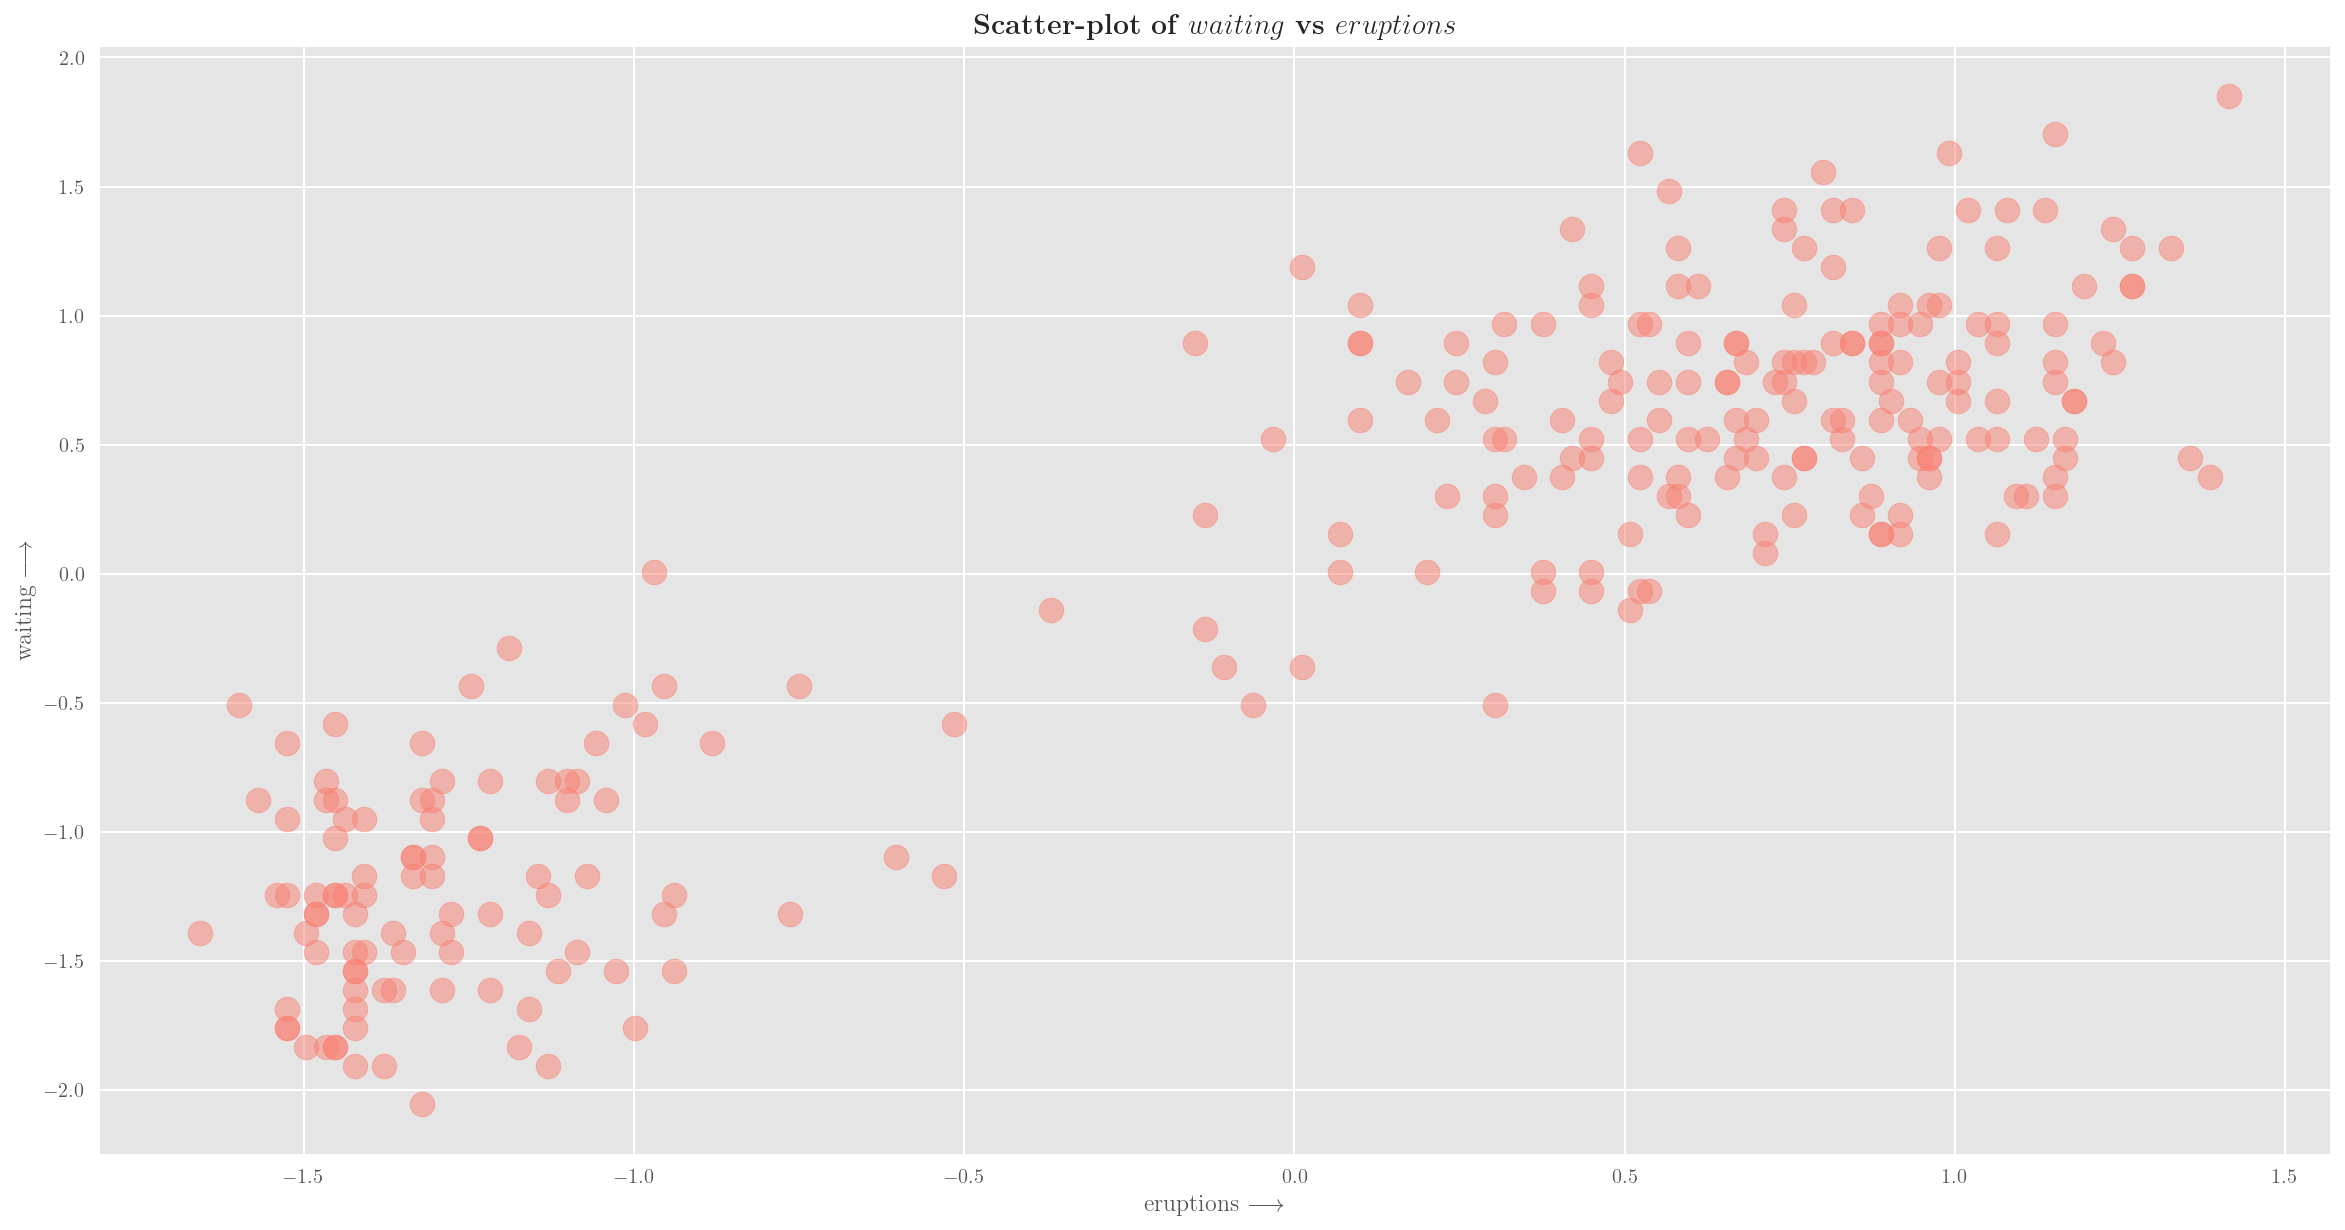

In [8]:
plt.scatter(data['eruptions'], data['waiting'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $waiting$ vs $eruptions$}')
plt.xlabel(r'eruptions $\longrightarrow$');
plt.ylabel(r'waiting $\longrightarrow$');

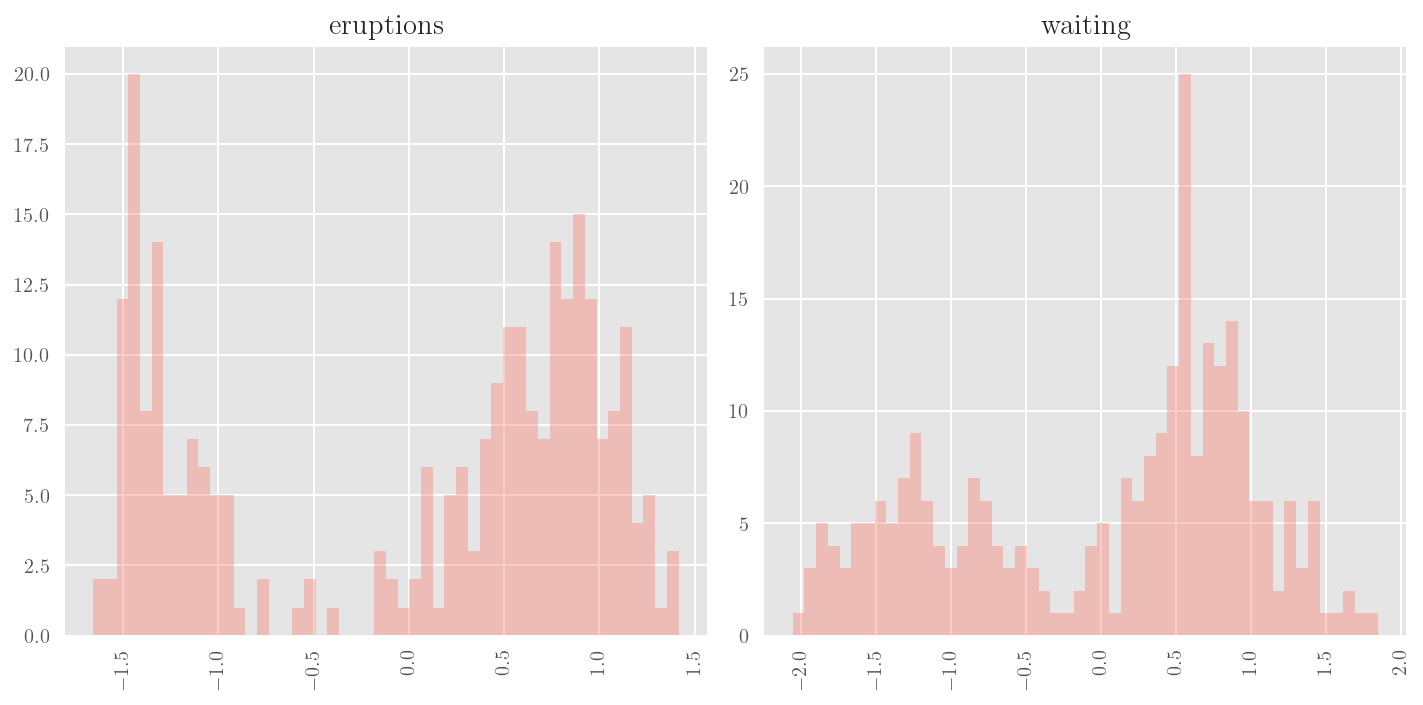

In [9]:
data.hist(bins=50, alpha = 0.4, color='salmon', xrot=90, figsize=(10,5));
plt.tight_layout()

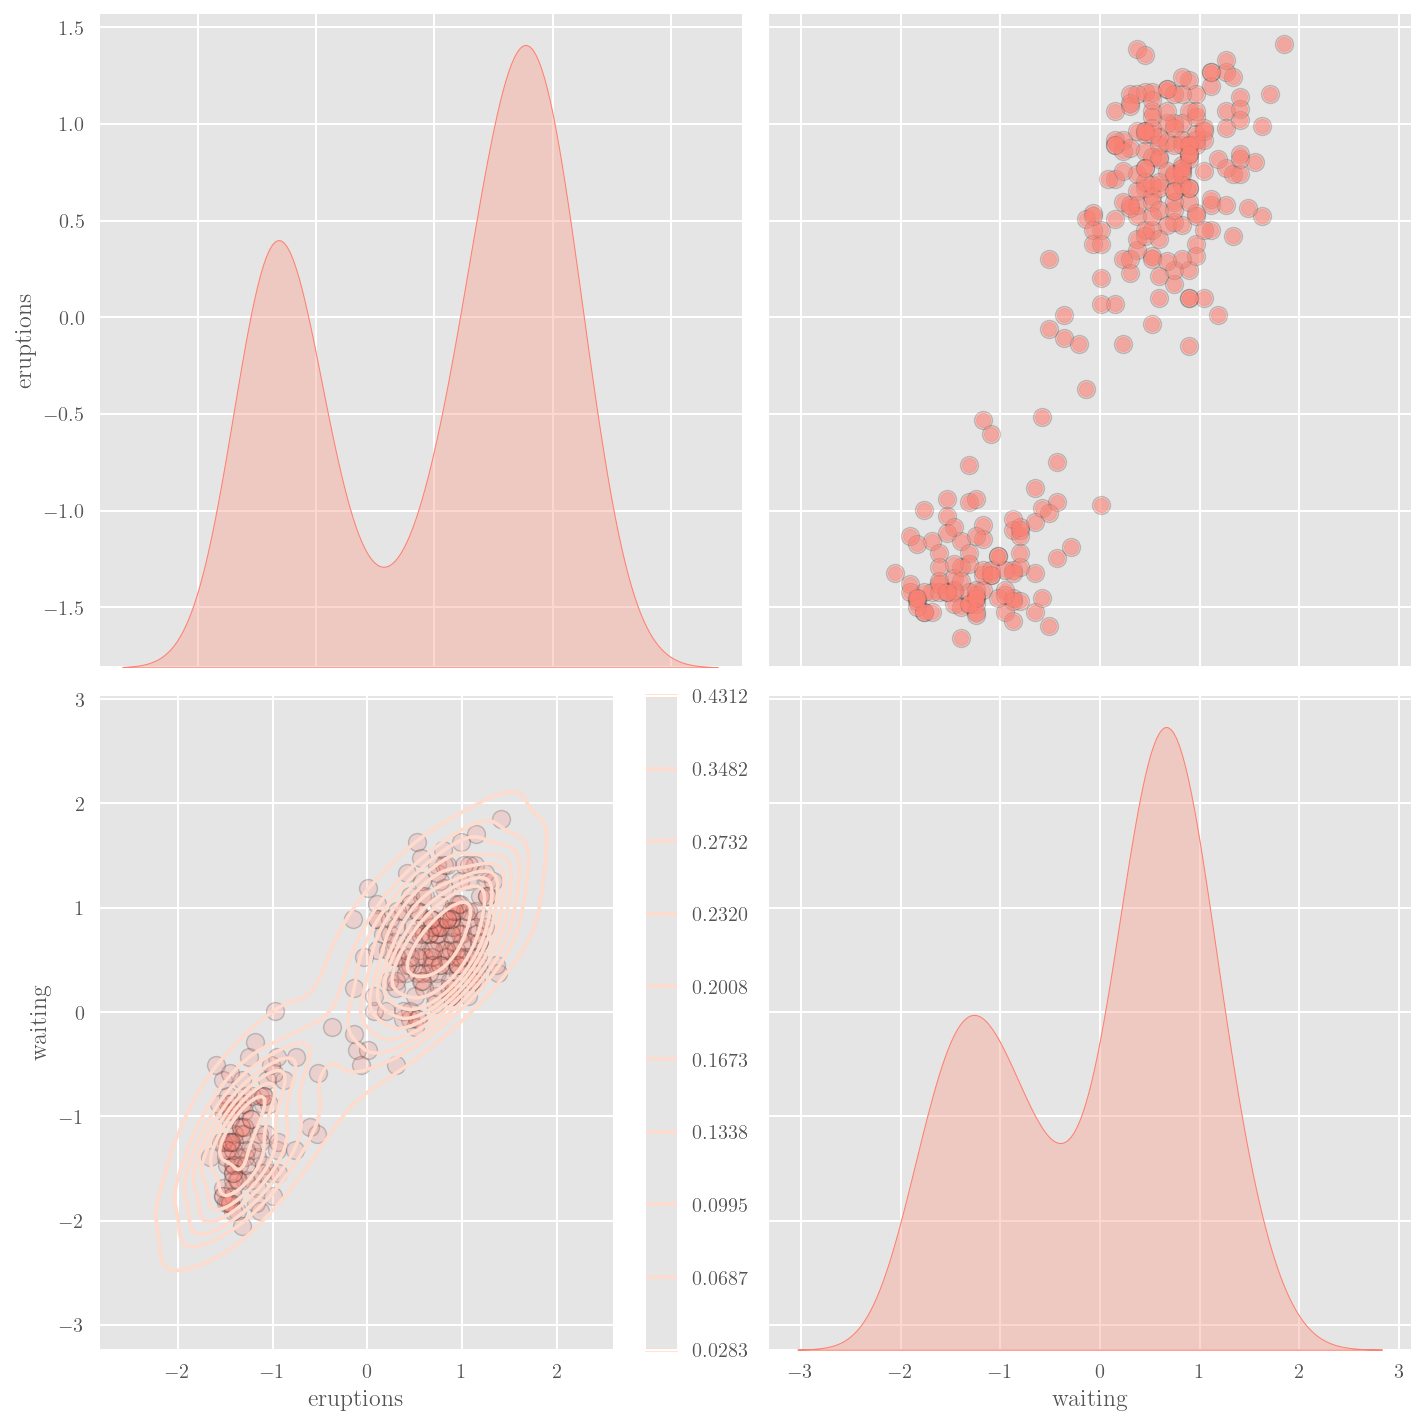

In [10]:

sns.set_palette("Reds")
sample = data
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', 'color':'salmon'}, 
                   size=5, );
g.map_diag(sns.kdeplot, color='salmon',  shade=True);
g.map_upper(plt.scatter, color='salmon', alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True);
plt.tight_layout()

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance.

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [11]:
X, y = data[['eruptions']], data['waiting']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [13]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [14]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: -0.011977424922084257, Slope: [0.91685839]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [15]:
yhat = model.predict(X_test)
print("Root Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat, squared=False))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Root Mean Squared Error: 0.45
Coefficient of Determination (R^2):0.7617235091913751


The coefficient of determination, $R^2$ indicates a fairly good model. The root mean squared error of 6-minutes is quite good, given the average waiting time of about 71 minutes.  Let us now continue on to the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

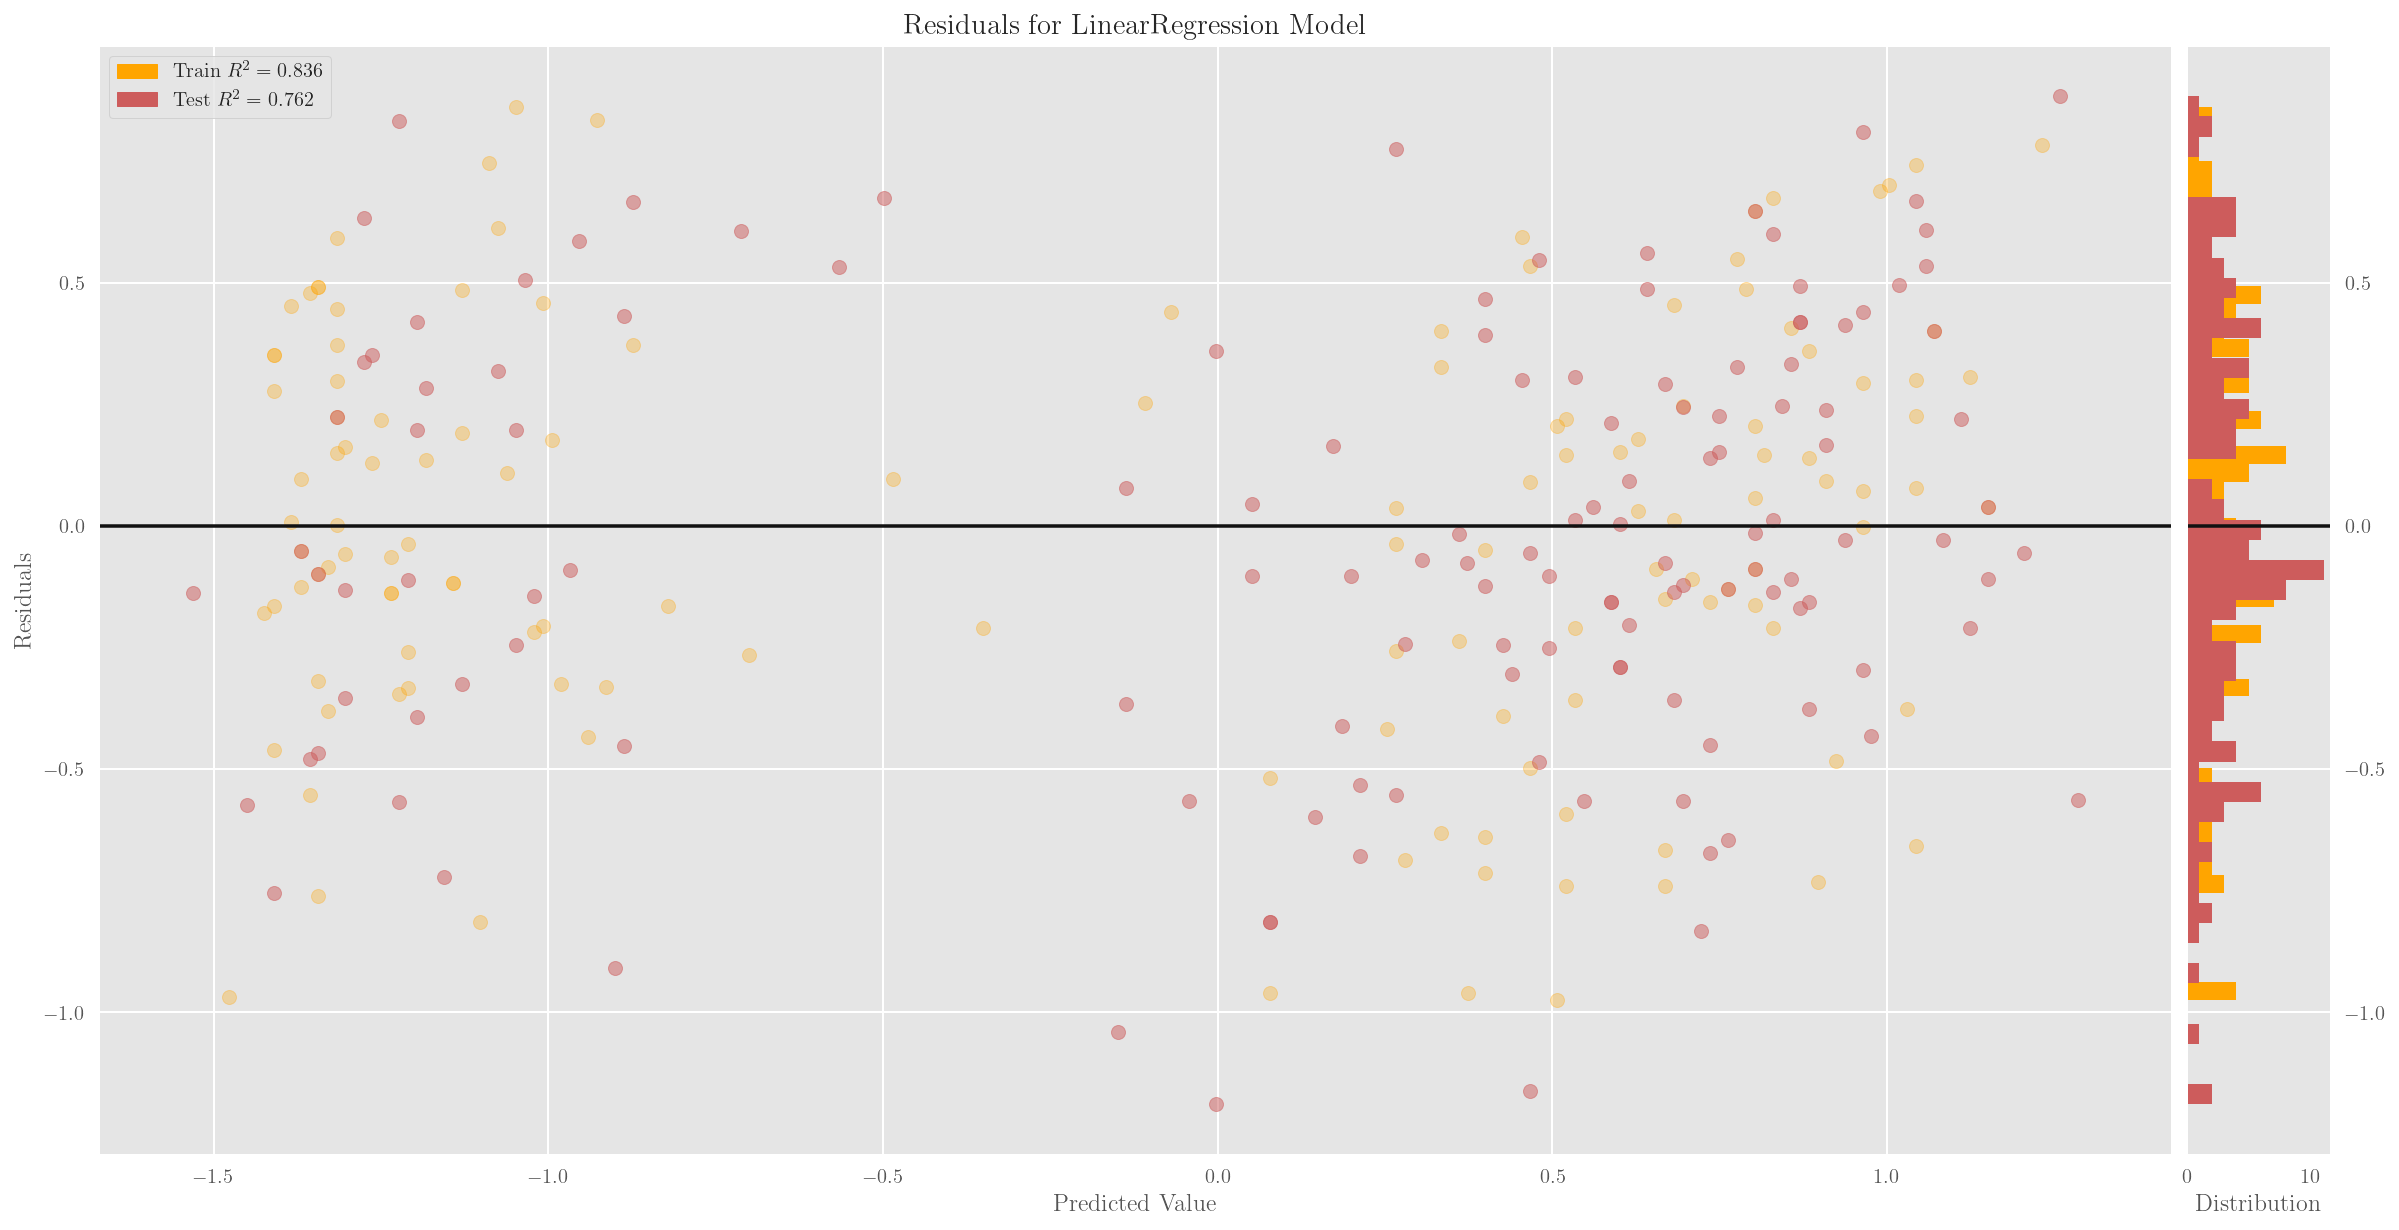

In [16]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals do not display any pronounced pattern, and have a rough homoscedasticity. This too is encouraging.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [18]:
 
XX = pd.DataFrame(data={'eruptions': np.linspace(data['eruptions'].min(), data['eruptions'].max(), 1000)}) 
yhat = model.predict(XX).reshape(-1,1)


AttributeError: 'DataFrame' object has no attribute 'x'

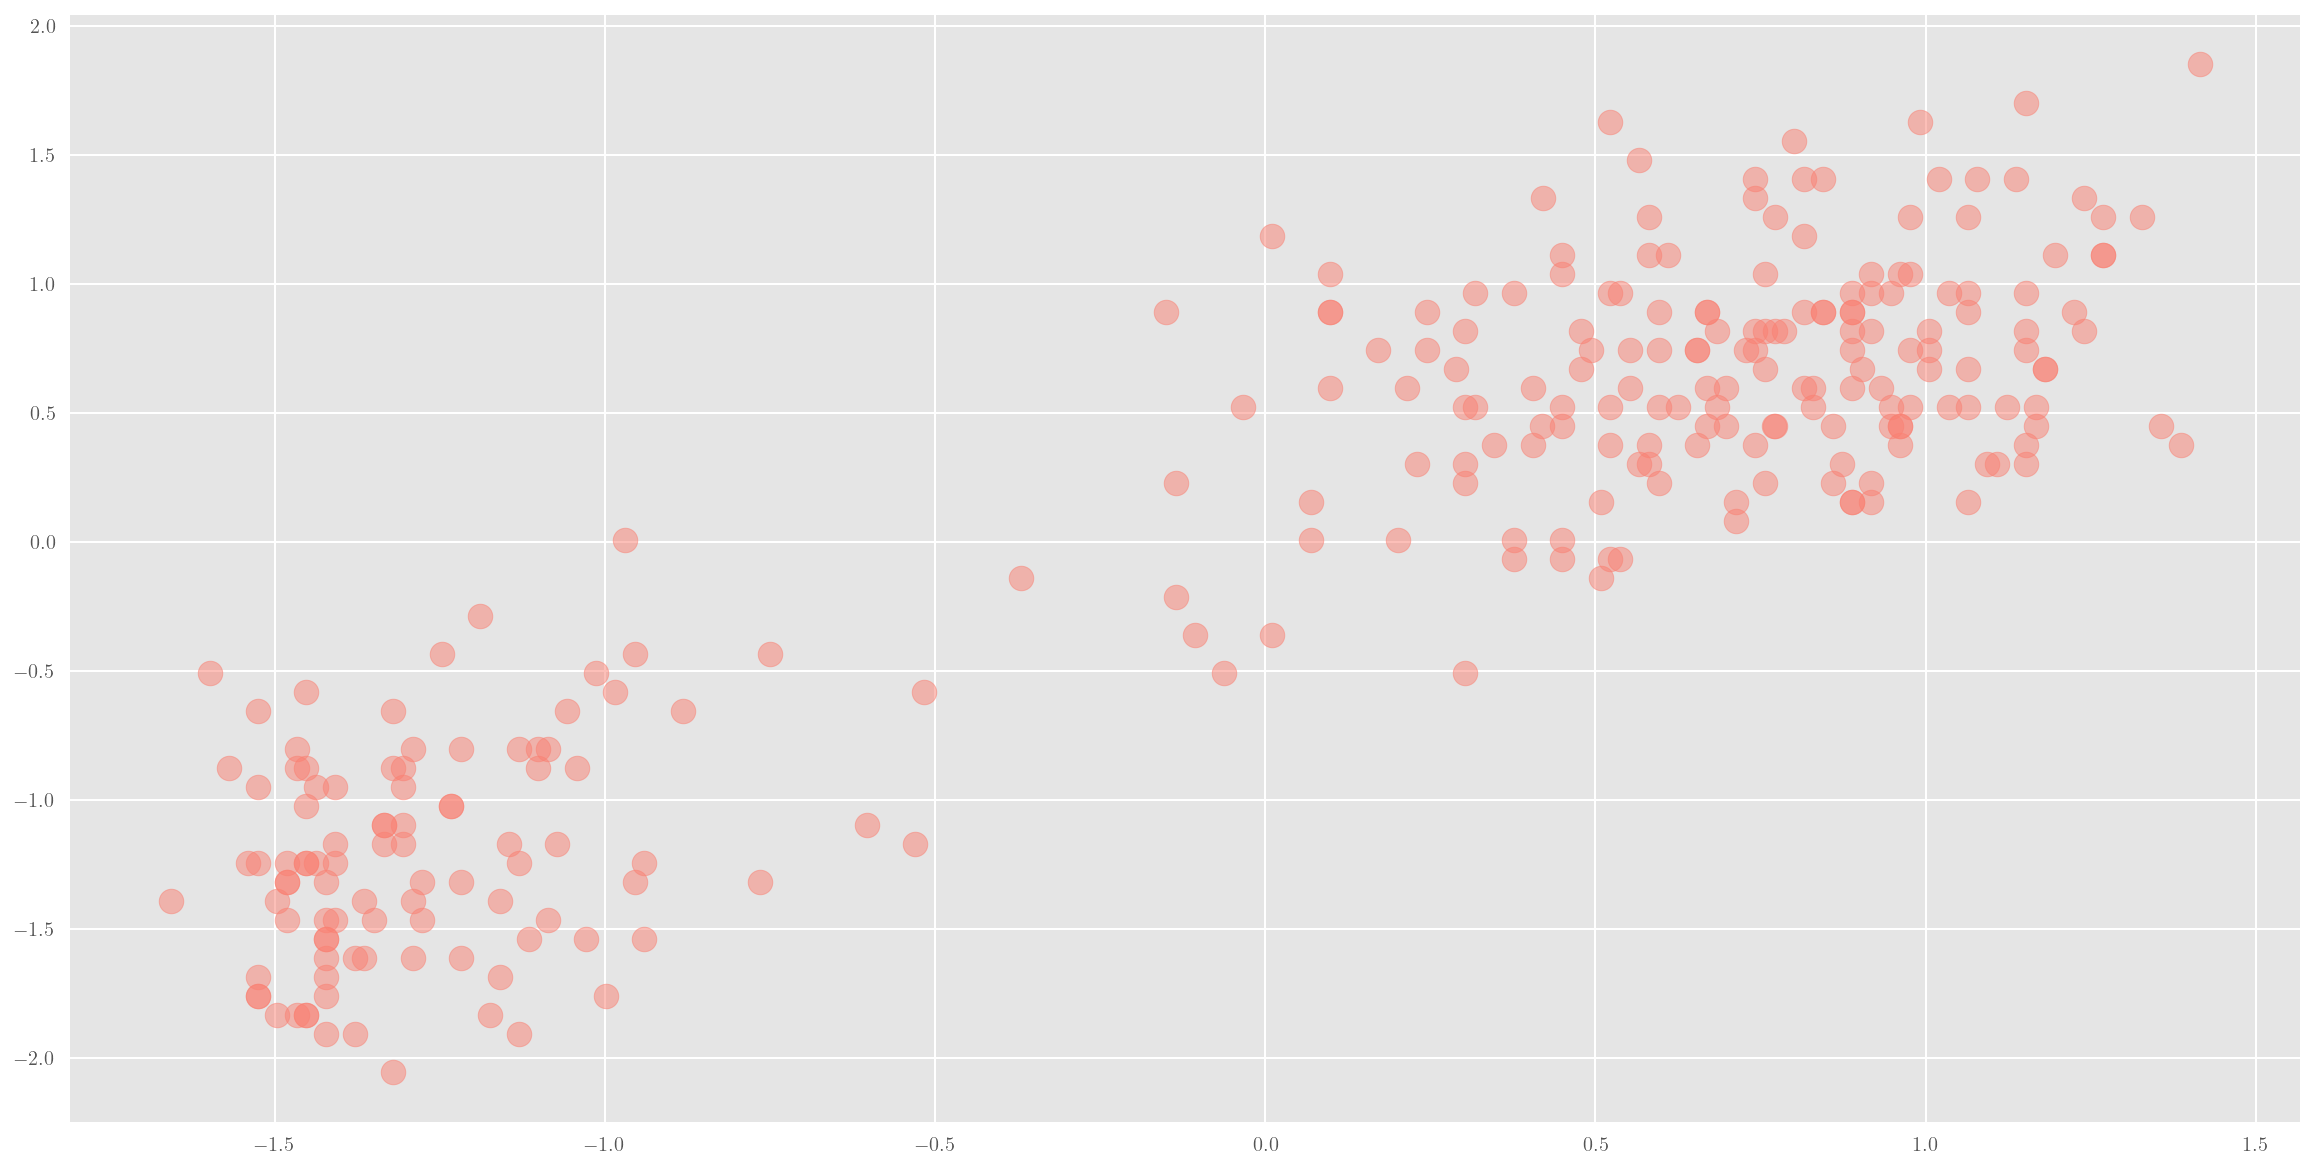

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['eruptions'], data['waiting'], alpha=0.5, s=150, color='salmon')
ax.plot(XX['eruptions'], yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model seems to have proved quite an effective estimator to predict waiting time for the next eruption.

*Would polynomial regression provide a better model? How would you explain the results?* We leave this as an exercise for the reader.